# Example Notebook #2
This notebook illustrates a portfolio construction process with the use of the `RiskModel` object. Its main purpose is to select a set of assets out of the investment universe characterised by the securities attribute in the `Portfolio` class. In this way, the process is repeated periodically forming a quantile spread on the selected factor. This simple dynamic factor allocation strategy can be backtested...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

In [2]:
#dev on the fly
os.chdir('C:\\Users\matus\pysource\portfolio_swissknife')

In [15]:
# !pip install .

In [4]:
from portfolio_swissknife import portfolio as ps
from portfolio_swissknife import risk_model as rm

## 1. Loading Data and Setup
First we load our universe -- in this case some custom data that is stored locally. We process the data and create a `Portfolio` object that serves as a corpus for our universe.

In [5]:
#loading ext. data -- close prices of SPX
universe = pd.read_csv('ext_data/00_db_SPX__PX_LAST.csv', index_col = 0, parse_dates = True)
universe = universe[::-1].loc[:,universe.notna().all(axis=0)]
securities = [universe.columns[i].split(' ')[0] for i, _ in enumerate(universe.columns)]
universe = universe.loc['2014':]

In [6]:
port_universe = ps.Portfolio(securities)
port_universe.set_custom_prices(universe, 'daily')

Then a risk model is specified and created using the familiar `RiskModel` object and prices are loaded. To construct a portfolio using a nonparametric sort we call the method `.rolling_factor_selection` that conducts and out-of-sample rolling estimation of all of the betas in our prespecified risk model. 


In [7]:
factors = ['SPY', 'VLUE', 'SIZE', 'QUAL', 'MTUM', 'USMV']
rm_universe = rm.RiskModel(port_universe, factors)
rm_universe.get_prices('daily')

[*********************100%***********************]  6 of 6 completed


In [8]:
rm_universe.rolling_factor_selection(10, 'linear', int(2*252), 22)

To simulate the strategy historically, we create the `FactorPotfolio` class inputting the universe `Portfolio` and `RiskModel` objects. We select the risk factor we would like to sort on, load our benchmark and discount rates and we are ready to backtest in the same way as we would backtest a portfolio with static assets.

In [9]:
factor_pf_vlue = ps.FactorPortfolio(port_universe, rm_universe, 'VLUE')
factor_pf_vlue.set_constraints(default = True)
factor_pf_vlue.set_benchmark('SPY')
factor_pf_vlue.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
factor_pf_vlue.historical_backtest(models=['EW','GMV','RP','MES'],frequency=22, estimation_period=int(2*252))

,EW,GMV,RP,MES
Average Returns,17.95%,10.64%,14.01%,12.47%
CAGR,15.07%,9.16%,12.41%,11.03%
Volatility,42.37%,32.63%,37.43%,35.32%
Max DD,48.10%,35.75%,40.67%,35.63%
Skewness,-0.20,-0.61,-0.57,-0.46
Kurtosis,-2.99,-2.99,-2.99,-2.99
Sharpe Ratio,0.38,0.27,0.32,0.30
Sortino Ratio,0.68,0.52,0.65,0.62
Calmar Ratio,-0.37,-0.30,-0.34,-0.35
Pain Ratio,272.12,231.81,285.37,272.87


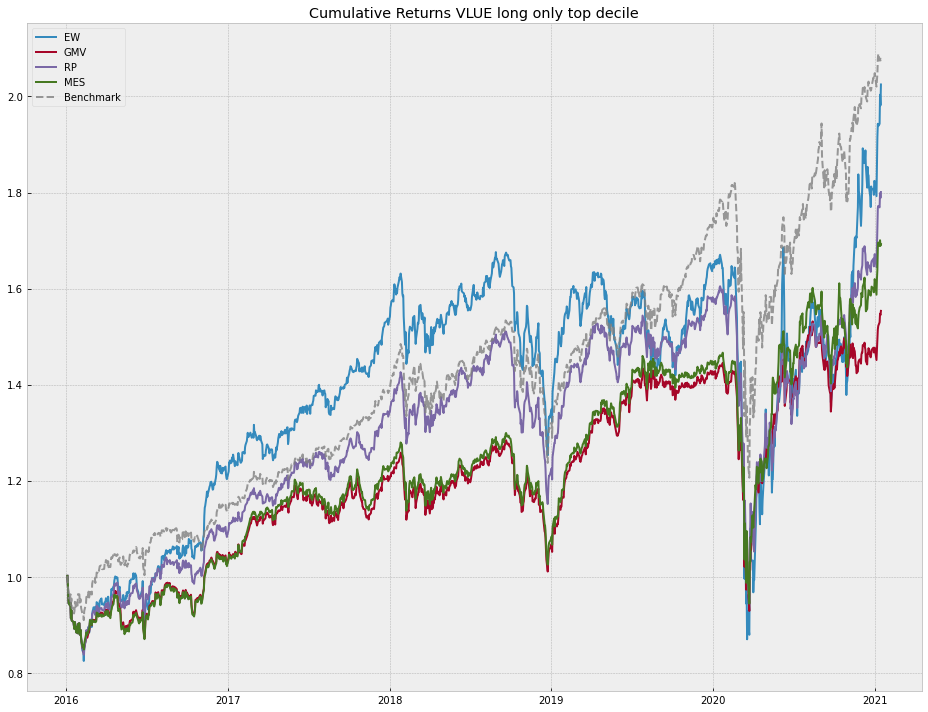

In [11]:
factor_pf_vlue.get_backtest_report(display_weights = False, title = 'VLUE long only top decile')

In [12]:
factor_pf_mtum = ps.FactorPortfolio(port_universe, rm_universe, 'MTUM')
factor_pf_mtum.set_constraints(default = True)
factor_pf_mtum.set_benchmark('SPY')
factor_pf_mtum.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
factor_pf_mtum.historical_backtest(models=['EW','GMV','RP','MES'],frequency=22, estimation_period=int(2*252))

C:\Users\matus\anaconda3\envs\dev01\lib\site-packages\portfolio_swissknife\metrics.py:98: RuntimeWarning: invalid value encountered in sqrt
  var = np.sqrt((nu_fit - 2) / nu_fit) * t.ppf(1 - alpha, nu_fit) * sig_fit_norm - mu_fit_norm


,EW,GMV,RP,MES
Average Returns,21.91%,15.57%,15.46%,15.15%
CAGR,21.61%,14.94%,14.65%,14.45%
Volatility,46.81%,39.46%,39.32%,38.92%
Max DD,35.49%,29.67%,34.21%,29.55%
Skewness,-0.57,-0.45,-1.07,-0.45
Kurtosis,-2.99,-2.99,-2.99,-2.99
Sharpe Ratio,0.43,0.34,0.34,0.34
Sortino Ratio,1.09,0.87,0.81,0.84
Calmar Ratio,-0.62,-0.52,-0.45,-0.51
Pain Ratio,709.94,599.22,525.73,598.83


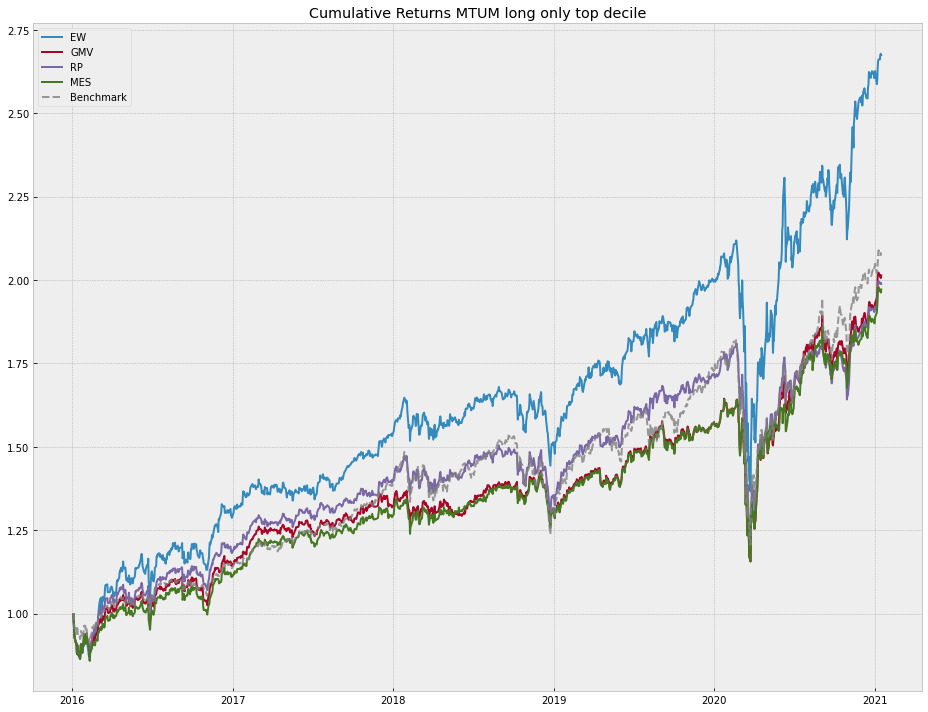

In [14]:
factor_pf_mtum.get_backtest_report(display_weights = False, title = 'MTUM long only top decile')